In [5]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import swan_vis as swan


p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [6]:
annot = '../../../refs/cerberus/v40_cerberus.gtf'
gtf = '../cerberus.gtf'
ab = '../cerberus_filtered_abundance.tsv'
gene_ab = '../../talon/human_talon_abundance.tsv'
meta = '../../swan/swan_metadata.tsv'

In [4]:
sg = swan.SwanGraph()
sg.add_annotation(annot)
sg.add_transcriptome(gtf, include_isms=True)



Adding annotation to the SwanGraph
> /Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/swangraph.py(900)create_dfs()
    898                 import pdb
    899                 pdb.set_trace()
--> 900                 loc_df = pd.concat([self.loc_df, loc_df])
    901                 edge_df = pd.concat([self.edge_df, edge_df])
    902                 t_df = pd.concat([self.t_df, t_df])



ipdb>  self.t_df.head()


Empty DataFrame
Columns: [tname, gid, gname, path, tid]
Index: []


ipdb>  self.loc_df.head()


Empty DataFrame
Columns: [chrom, coord, vertex_id]
Index: []


ipdb>  c



Adding transcriptome to the SwanGraph
> /Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/swangraph.py(900)create_dfs()
    898                 import pdb
    899                 pdb.set_trace()
--> 900                 loc_df = pd.concat([self.loc_df, loc_df])
    901                 edge_df = pd.concat([self.edge_df, edge_df])
    902                 t_df = pd.concat([self.t_df, t_df])



ipdb>  self.t_df.head()


                                tname              gid   gname  \
tid                                                              
ENSG00000000003[1,1,1]  TSPAN6[1,1,1]  ENSG00000000003  TSPAN6   
ENSG00000000003[1,4,3]  TSPAN6[1,4,3]  ENSG00000000003  TSPAN6   
ENSG00000000003[2,2,1]  TSPAN6[2,2,1]  ENSG00000000003  TSPAN6   
ENSG00000000003[2,3,2]  TSPAN6[2,3,2]  ENSG00000000003  TSPAN6   
ENSG00000000003[3,5,4]  TSPAN6[3,5,4]  ENSG00000000003  TSPAN6   

                                                                     path  \
tid                                                                         
ENSG00000000003[1,1,1]  [923954, 923955, 923956, 923957, 923958, 92395...   
ENSG00000000003[1,4,3]  [923974, 923975, 923956, 923957, 923958, 92395...   
ENSG00000000003[2,2,1]  [923977, 923972, 923956, 923957, 923958, 92395...   
ENSG00000000003[2,3,2]  [923977, 923972, 923956, 923957, 923958, 92395...   
ENSG00000000003[3,5,4]  [923969, 923970, 923971, 923972, 923956, 92395...  

ipdb>  self.t_df.loc[self.t_df.gid == 'ENSG00000011638']


                               tname              gid  gname  \
tid                                                            
ENSG00000011638[1,1,1]  LDAF1[1,1,1]  ENSG00000011638  LDAF1   
ENSG00000011638[1,2,2]  LDAF1[1,2,2]  ENSG00000011638  LDAF1   
ENSG00000011638[1,3,1]  LDAF1[1,3,1]  ENSG00000011638  LDAF1   
ENSG00000011638[1,4,3]  LDAF1[1,4,3]  ENSG00000011638  LDAF1   
ENSG00000011638[1,5,2]  LDAF1[1,5,2]  ENSG00000011638  LDAF1   
ENSG00000011638[1,6,4]  LDAF1[1,6,4]  ENSG00000011638  LDAF1   
ENSG00000011638[1,7,5]  LDAF1[1,7,5]  ENSG00000011638  LDAF1   
ENSG00000011638[2,8,6]  LDAF1[2,8,6]  ENSG00000011638  LDAF1   
ENSG00000011638[3,9,1]  LDAF1[3,9,1]  ENSG00000011638  LDAF1   

                                                                     path  \
tid                                                                         
ENSG00000011638[1,1,1]  [317170, 317171, 317172, 317173, 317174, 31717...   
ENSG00000011638[1,2,2]  [317170, 317179, 317187, 317188, 317172,

ipdb>  t_df.loc[t_df.gid == 'ENSG00000011638']


                                   tname              gid    gname  \
tid                                                                  
ENSG00000011638[5,10,1]  TMEM159[5,10,1]  ENSG00000011638  TMEM159   
ENSG00000011638[5,10,6]  TMEM159[5,10,6]  ENSG00000011638  TMEM159   
ENSG00000011638[1,13,1]  TMEM159[1,13,1]  ENSG00000011638  TMEM159   
ENSG00000011638[1,13,6]  TMEM159[1,13,6]  ENSG00000011638  TMEM159   
ENSG00000011638[1,11,6]  TMEM159[1,11,6]  ENSG00000011638  TMEM159   
ENSG00000011638[1,11,1]  TMEM159[1,11,1]  ENSG00000011638  TMEM159   
ENSG00000011638[1,12,1]  TMEM159[1,12,1]  ENSG00000011638  TMEM159   
ENSG00000011638[1,12,6]  TMEM159[1,12,6]  ENSG00000011638  TMEM159   
ENSG00000011638[2,1,1]    TMEM159[2,1,1]  ENSG00000011638  TMEM159   
ENSG00000011638[1,1,6]    TMEM159[1,1,6]  ENSG00000011638  TMEM159   
ENSG00000011638[1,1,7]    TMEM159[1,1,7]  ENSG00000011638  TMEM159   
ENSG00000011638[1,3,6]    TMEM159[1,3,6]  ENSG00000011638  TMEM159   
ENSG00000011638[1,3,

ipdb>  q


BdbQuit: 

In [4]:
sg.save_graph('test')

Saving graph as test.p


In [6]:
sg = swan.read('test.p')

Read in graph from test.p


In [12]:
sg.t_df.loc[sg.t_df.gid == 'ENSG00000011638']

,tname,gid,gname,path,tid,tss_id,ic_id,tes_id,loc_path,annotation,novelty
tid,,,,,,,,,,,
"ENSG00000011638[1,1,1]","LDAF1[1,1,1]",ENSG00000011638,LDAF1,"[317170, 317171, 317172, 317173, 317174, 31717...","ENSG00000011638[1,1,1]",ENSG00000011638_1,ENSG00000011638_1,ENSG00000011638_1,"[335460, 335461, 335466, 335467, 335472, 33547...",True,Known
"ENSG00000011638[1,1,6]","TMEM159[1,1,6]",ENSG00000011638,TMEM159,"[317170, 317171, 317172, 317173, 317174, 31717...","ENSG00000011638[1,1,6]",ENSG00000011638_1,ENSG00000011638_1,ENSG00000011638_6,"[335460, 335461, 335466, 335467, 335472, 33547...",False,Known
"ENSG00000011638[1,1,7]","TMEM159[1,1,7]",ENSG00000011638,TMEM159,"[317170, 317171, 317172, 317173, 317174, 31717...","ENSG00000011638[1,1,7]",ENSG00000011638_1,ENSG00000011638_1,ENSG00000011638_7,"[335460, 335461, 335466, 335467, 335472, 33547...",False,Known
"ENSG00000011638[1,11,1]","TMEM159[1,11,1]",ENSG00000011638,TMEM159,"[317170, 317179, 317180, 317181, 317182, 31718...","ENSG00000011638[1,11,1]",ENSG00000011638_1,ENSG00000011638_11,ENSG00000011638_1,"[335460, 335461, 335464, 335467, 335468, 33546...",False,NIC
"ENSG00000011638[1,11,6]","TMEM159[1,11,6]",ENSG00000011638,TMEM159,"[317170, 317179, 317180, 317181, 317182, 31718...","ENSG00000011638[1,11,6]",ENSG00000011638_1,ENSG00000011638_11,ENSG00000011638_6,"[335460, 335461, 335464, 335467, 335468, 33546...",False,NIC
"ENSG00000011638[1,12,1]","TMEM159[1,12,1]",ENSG00000011638,TMEM159,"[317170, 317179, 317180, 317173, 317174, 31717...","ENSG00000011638[1,12,1]",ENSG00000011638_1,ENSG00000011638_12,ENSG00000011638_1,"[335460, 335461, 335464, 335467, 335472, 33547...",False,NIC
"ENSG00000011638[1,12,6]","TMEM159[1,12,6]",ENSG00000011638,TMEM159,"[317170, 317179, 317180, 317173, 317174, 31717...","ENSG00000011638[1,12,6]",ENSG00000011638_1,ENSG00000011638_12,ENSG00000011638_6,"[335460, 335461, 335464, 335467, 335472, 33547...",False,NIC
"ENSG00000011638[1,13,1]","TMEM159[1,13,1]",ENSG00000011638,TMEM159,"[317170, 317179, 317180, 317173, 317174, 31718...","ENSG00000011638[1,13,1]",ENSG00000011638_1,ENSG00000011638_13,ENSG00000011638_1,"[335460, 335461, 335464, 335467, 335472, 33547...",False,NIC
"ENSG00000011638[1,13,6]","TMEM159[1,13,6]",ENSG00000011638,TMEM159,"[317170, 317179, 317180, 317173, 317174, 31718...","ENSG00000011638[1,13,6]",ENSG00000011638_1,ENSG00000011638_13,ENSG00000011638_6,"[335460, 335461, 335464, 335467, 335472, 33547...",False,NIC


In [5]:
sg.add_abundance(ab)



Adding abundance for datasets k562_2_1, gm12878_2_1, hepg2_1_1, h1_1_1, pgp1_astro_1_2... (and 133 more) to SwanGraph
Calculating TPM...
Calculating PI...


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:410: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Calculating edge usage...


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Calculating TSS usage...
Using cerberus IDs to calculate


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


> /Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/swangraph.py(624)create_feat_adata()
    622             adata.layers['tpm'] = sparse.csr_matrix(calc_tpm(adata, recalc=True).to_numpy())
    623             pdb.set_trace()
--> 624             if not self.sc:
    625 	        adata.layers['pi'] = sparse.csr_matrix(calc_pi(adata,
    626 	                adata.var)[0].to_numpy())



ipdb>  adata.var.head()


                               gid   gname  vertex  tss_name
tss_id                                                      
ENSG00000000003_1  ENSG00000000003  TSPAN6  940314  TSPAN6_1
ENSG00000000003_2  ENSG00000000003  TSPAN6  940316  TSPAN6_2
ENSG00000000005_2  ENSG00000000005    TNMD  940275    TNMD_2
ENSG00000000005_3  ENSG00000000005    TNMD  940270    TNMD_3
ENSG00000000419_1  ENSG00000000419    DPM1  576310    DPM1_1


ipdb>  beep = adata.var.copy(deep=True)
ipdb>  beep.reset_index(inplace=True)
ipdb>  beep.loc[beep.tss_id.duplicated(keep=False)].sort_values(by='tss_id')


                  tss_id              gid            gname  vertex  \
1021   ENSG00000011638_1  ENSG00000011638            LDAF1  335460   
1023   ENSG00000011638_1  ENSG00000011638          TMEM159  335460   
1022   ENSG00000011638_2  ENSG00000011638            LDAF1  335459   
1024   ENSG00000011638_2  ENSG00000011638          TMEM159  335459   
1174   ENSG00000014257_1  ENSG00000014257             ACP3  652161   
...                  ...              ...              ...     ...   
72608  ENSG00000285906_1  ENSG00000285906  ENSG00000285906  617245   
72632  ENSG00000285976_1  ENSG00000285976       AL135905.2  778591   
72634  ENSG00000285976_1  ENSG00000285976  ENSG00000285976  778591   
72637  ENSG00000285988_1  ENSG00000285988       AL392086.3   93412   
72639  ENSG00000285988_1  ENSG00000285988  ENSG00000285988   93412   

                tss_name  
1021             LDAF1_1  
1023           TMEM159_1  
1022             LDAF1_2  
1024           TMEM159_2  
1174              ACP3_1

ipdb>  beep.loc[beep.tss_id.duplicated(keep=False)].sort_values(by='tss_id').gid.unique()


array(['ENSG00000011638', 'ENSG00000014257', 'ENSG00000018610',
       'ENSG00000031698', 'ENSG00000035687', 'ENSG00000036549',
       'ENSG00000040487', 'ENSG00000051009', 'ENSG00000064205',
       'ENSG00000065427', 'ENSG00000065600', 'ENSG00000066379',
       'ENSG00000072415', 'ENSG00000088854', 'ENSG00000090861',
       'ENSG00000099284', 'ENSG00000099785', 'ENSG00000100167',
       'ENSG00000100890', 'ENSG00000102125', 'ENSG00000103254',
       'ENSG00000104331', 'ENSG00000104522', 'ENSG00000104957',
       'ENSG00000104964', 'ENSG00000105849', 'ENSG00000105926',
       'ENSG00000105968', 'ENSG00000106105', 'ENSG00000108021',
       'ENSG00000108387', 'ENSG00000110619', 'ENSG00000111412',
       'ENSG00000112144', 'ENSG00000112761', 'ENSG00000113163',
       'ENSG00000113407', 'ENSG00000113643', 'ENSG00000113648',
       'ENSG00000114656', 'ENSG00000115866', 'ENSG00000116299',
       'ENSG00000116747', 'ENSG00000116863', 'ENSG00000117791',
       'ENSG00000117877', 'ENSG000001183

ipdb>  len(beep.loc[beep.tss_id.duplicated(keep=False)].sort_values(by='tss_id').gid.tolist())


1692


ipdb>  len(beep.loc[beep.tss_id.duplicated(keep=False)].sort_values(by='tss_id').gid.unique().tolist())


751


ipdb>  q


BdbQuit: 

In [ ]:
sg.add_abundance(gene_ab, how='gene')

# add metadata and add colors
sg.add_metadata(meta)
c_dict, order = get_biosample_colors()
sg.set_metadata_colors('sample', c_dict)
c_dict, order = get_ad_colors()
sg.set_metadata_colors('health_status', c_dict)

In [ ]:
## Real stuff

In [13]:
sg = 'swan.p'
ab = '../cerberus_filtered_abundance.tsv'

In [14]:
sg = swan.read('swan.p')

Read in graph from swan.p


In [4]:
# sg.t_df.novelty.unique()

In [5]:
# temp = sg.t_df[['novelty', 'tid']]
# temp.reset_index(drop=True, inplace=True)
# temp[['novelty', 'tid']].groupby('novelty').count()

In [6]:
# sg.t_df.loc[sg.t_df.novelty == 'Undefined']

In [7]:
# sg.save_graph('swan')

## Swan reports

In [8]:
sg = swan.read('swan.p')
datasets = []
datasets += sg.adata.obs.loc[sg.adata.obs['sample'].str.contains('h9'), 'sample'].unique().tolist()
datasets += sg.adata.obs.loc[sg.adata.obs['sample'].str.contains('pgp1'), 'sample'].unique().tolist()
datasets.append('caco2')
print(datasets)

sg.gen_report('MEF2C',
              prefix='figures/mef2c_h9_pgp1_caco2',
              layer='pi',
              cmap='magma',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              datasets={'sample': datasets},
              browser=True)

# sg.gen_report('MEF2C',
#               prefix='figures/mef2c_h9_pgp1_caco2',
#               layer='tpm',
#               cmap='viridis',
#               novelty=True,
#               groupby='sample',
#               transcript_col='tname',
#               metadata_cols=['sample'],
#               indicate_novel=True,
#               datasets={'sample': datasets})


Read in graph from swan.p
['h9_neural_crest', 'h9_chondro', 'h9', 'h9_de', 'h9_panc_progen', 'h9_panc_beta', 'h9_osteocyte', 'pgp1', 'pgp1_astro', 'pgp1_excite_neuron', 'pgp1_endo', 'caco2']

Plotting transcripts for ENSG00000081189.15
Saving transcript path graph for ENSG00000081189[1,10,5] as figures/mef2c_h9_pgp1_caco2_browser_ENSG00000081189[1,10,5]_path.png
Saving transcript path graph for ENSG00000081189[1,13,8] as figures/mef2c_h9_pgp1_caco2_browser_ENSG00000081189[1,13,8]_path.png
Saving transcript path graph for ENSG00000081189[1,64,4] as figures/mef2c_h9_pgp1_caco2_browser_ENSG00000081189[1,64,4]_path.png
Saving transcript path graph for ENSG00000081189[1,62,4] as figures/mef2c_h9_pgp1_caco2_browser_ENSG00000081189[1,62,4]_path.png
Saving transcript path graph for ENSG00000081189[1,43,20] as figures/mef2c_h9_pgp1_caco2_browser_ENSG00000081189[1,43,20]_path.png
Saving transcript path graph for ENSG00000081189[1,64,5] as figures/mef2c_h9_pgp1_caco2_browser_ENSG00000081189[1,64,

In [2]:
# bin1
sg = swan.read('swan.p')

gene = 'BIN1'
opref = 'figures/{}'.format(gene)
conds = sg.adata.obs.loc[sg.adata.obs['sample'].str.contains('pgp1'), 'sample'].unique().tolist()
conds = ['pgp1', 'pgp1_astro', 'pgp1_endo', 'pgp1_excite_neuron']
sg.gen_report(gene,
          prefix=opref,
          layer='pi',
          order='pi',
          cmap='magma',
          novelty=True,
          metadata_cols=['sample'],
          groupby='sample',
          datasets={'sample': conds},
          transcript_col='tname',
          display_numbers=True,
          browser=True)

Read in graph from swan.p

Plotting transcripts for ENSG00000136717.14
Saving transcript path graph for ENSG00000136717[1,2,1] as figures/BIN1_browser_ENSG00000136717[1,2,1]_path.png
Saving transcript path graph for ENSG00000136717[2,2,1] as figures/BIN1_browser_ENSG00000136717[2,2,1]_path.png
Saving transcript path graph for ENSG00000136717[1,4,1] as figures/BIN1_browser_ENSG00000136717[1,4,1]_path.png
Saving transcript path graph for ENSG00000136717[2,1,1] as figures/BIN1_browser_ENSG00000136717[2,1,1]_path.png
Saving transcript path graph for ENSG00000136717[1,1,1] as figures/BIN1_browser_ENSG00000136717[1,1,1]_path.png
Saving transcript path graph for ENSG00000136717[1,20,1] as figures/BIN1_browser_ENSG00000136717[1,20,1]_path.png
Saving transcript path graph for ENSG00000136717[4,15,1] as figures/BIN1_browser_ENSG00000136717[4,15,1]_path.png
Saving transcript path graph for ENSG00000136717[1,18,1] as figures/BIN1_browser_ENSG00000136717[1,18,1]_path.png
Saving transcript path grap

In [3]:
sg = swan.read('swan.p')
sg.gen_report('SOX9',
              prefix='figures/sox9',
              layer='tpm',
              cmap='viridis',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              indicate_novel=True)
sg.gen_report('SOX9',
              prefix='figures/sox9',
              layer='pi',
              cmap='magma',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              browser=True)

Read in graph from swan.p

Plotting transcripts for ENSG00000125398.6
Saving transcript path graph for ENSG00000125398[1,1,1] as figures/sox9_novel_ENSG00000125398[1,1,1]_path.png
Saving transcript path graph for ENSG00000125398[2,2,1] as figures/sox9_novel_ENSG00000125398[2,2,1]_path.png
Saving transcript path graph for ENSG00000125398[3,2,1] as figures/sox9_novel_ENSG00000125398[3,2,1]_path.png
Generating report for ENSG00000125398.6

Plotting transcripts for ENSG00000125398.6
Saving transcript path graph for ENSG00000125398[1,1,1] as figures/sox9_browser_ENSG00000125398[1,1,1]_path.png
Saving transcript path graph for ENSG00000125398[2,2,1] as figures/sox9_browser_ENSG00000125398[2,2,1]_path.png
Saving transcript path graph for ENSG00000125398[3,2,1] as figures/sox9_browser_ENSG00000125398[3,2,1]_path.png
Generating report for ENSG00000125398.6


In [16]:
gname = 'KATNAL1'
sg = swan.read('swan.p')
sg.gen_report(gname,
              prefix='figures/{}'.format(gname.lower()),
              layer='tpm',
              cmap='viridis',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              indicate_novel=True)
sg.gen_report(gname,
              prefix='figures/{}'.format(gname.lower()),
              layer='pi',
              cmap='magma',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              browser=True)

Read in graph from swan.p

Plotting transcripts for ENSG00000102781.13
Saving transcript path graph for ENSG00000102781[1,1,1] as figures/katnal1_novel_ENSG00000102781[1,1,1]_path.png
Saving transcript path graph for ENSG00000102781[2,2,2] as figures/katnal1_novel_ENSG00000102781[2,2,2]_path.png
Saving transcript path graph for ENSG00000102781[1,1,2] as figures/katnal1_novel_ENSG00000102781[1,1,2]_path.png
Saving transcript path graph for ENSG00000102781[2,6,6] as figures/katnal1_novel_ENSG00000102781[2,6,6]_path.png
Saving transcript path graph for ENSG00000102781[1,1,5] as figures/katnal1_novel_ENSG00000102781[1,1,5]_path.png
Saving transcript path graph for ENSG00000102781[2,2,5] as figures/katnal1_novel_ENSG00000102781[2,2,5]_path.png
Saving transcript path graph for ENSG00000102781[2,6,2] as figures/katnal1_novel_ENSG00000102781[2,6,2]_path.png
Saving transcript path graph for ENSG00000102781[4,6,5] as figures/katnal1_novel_ENSG00000102781[4,6,5]_path.png
Saving transcript path gr

In [15]:
sg = swan.read('swan.p')
sg.gen_report('KMT2A',
              prefix='figures/kmt2a',
              layer='tpm',
              cmap='viridis',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              indicate_novel=True)
sg.gen_report('KMT2A',
              prefix='figures/kmt2a',
              layer='pi',
              cmap='magma',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              browser=True)

Read in graph from swan.p

Plotting transcripts for ENSG00000118058.21
Saving transcript path graph for ENSG00000118058[3,9,6] as figures/kmt2a_novel_ENSG00000118058[3,9,6]_path.png
Saving transcript path graph for ENSG00000118058[21,3,2] as figures/kmt2a_novel_ENSG00000118058[21,3,2]_path.png
Saving transcript path graph for ENSG00000118058[4,14,8] as figures/kmt2a_novel_ENSG00000118058[4,14,8]_path.png
Saving transcript path graph for ENSG00000118058[20,33,4] as figures/kmt2a_novel_ENSG00000118058[20,33,4]_path.png
Saving transcript path graph for ENSG00000118058[1,9,6] as figures/kmt2a_novel_ENSG00000118058[1,9,6]_path.png
Saving transcript path graph for ENSG00000118058[18,31,24] as figures/kmt2a_novel_ENSG00000118058[18,31,24]_path.png
Saving transcript path graph for ENSG00000118058[21,8,27] as figures/kmt2a_novel_ENSG00000118058[21,8,27]_path.png
Saving transcript path graph for ENSG00000118058[1,3,2] as figures/kmt2a_novel_ENSG00000118058[1,3,2]_path.png
Saving transcript path 

### How many isoforms does it take to get 90% expression / gene / sample?

In [8]:
sg = swan.read('swan.p')
t_df = pd.read_csv(ab, sep='\t')

Read in graph from swan.p


In [9]:
t_df = t_df[['annot_gene_name', 'annot_transcript_id', 'annot_gene_id']]
t_df.rename({'annot_gene_name': 'gname',
             'annot_gene_id': 'gid',
             'annot_transcript_id': 'tid'}, 
             axis=1, 
             inplace=True)

df, _ = swan.calc_pi(sg.adata, sg.t_df, obs_col='sample')
df = df.sparse.to_dense()
df = df.transpose()
df = df.merge(t_df[['tid', 'gname', 'gid']], how='inner', on='tid')

df.set_index(['tid', 'gname', 'gid'], inplace=True)
df = df.melt(ignore_index=False, value_name='pi', var_name='sample')
df = df.dropna(subset=['pi'])
df.reset_index(inplace=True)

# determine the rank of each pi value for each sample / gene combo
df = df.sort_values(by='pi', ascending=False)
df['pi_rank'] = df.sort_values(by='pi', ascending=False).groupby(['gname', 'gid', 'sample']).cumcount()+1

# add a column that we can check for convergence with 
df['gname_gid_biosamp'] = df.gname+'_'+df.gid+'_'+df['sample']

iso_df = pd.DataFrame()
max_pi_rank = df.pi_rank.max()
for max_pi in range(1, max_pi_rank+1):
    pi_ranks = [i for i in range(1, max_pi+1)]
    # for the first iteration, we don't have to limit which genes we look at
    if max_pi == 1:
        temp = df.loc[df.pi_rank.isin(pi_ranks)].groupby(['gname_gid_biosamp']).sum().reset_index()
    else:
        ids = iso_df.gname_gid_biosamp.tolist()
        temp = df.loc[(~df.gname_gid_biosamp.isin(ids))&(df.pi_rank.isin(pi_ranks))].groupby(['gname_gid_biosamp']).sum().reset_index()
    
    # converged if no more entries to analyze
    if len(temp.index) == 0:
        break
    
    # get isoforms that have >90% isoform exp accounted for
    temp = temp.loc[temp.pi >= 90]
    temp.drop(['pi_rank'], axis=1, inplace=True)
    temp['n_isos'] = max_pi
    
    iso_df = pd.concat([iso_df, temp])

# get list of isoforms required for each sample / gene combination as well
df = df.merge(iso_df, how='left', on='gname_gid_biosamp')
df['in_90_set'] = df.pi_rank <= df.n_isos
df = df.loc[df.in_90_set]
df[['gname', 'gid', 'sample']] = df.gname_gid_biosamp.str.split('_', n=2, expand=True)    
df.rename({'pi_x': 'pi'}, axis=1, inplace=True)
df.drop(['gname_gid_biosamp', 
        'pi_y', 'n_isos', 'in_90_set'], axis=1, inplace=True)

# get the sample / gene vs. n isoforms required for 90%    
iso_df[['gname', 'gid', 'sample']] = iso_df.gname_gid_biosamp.str.split('_', n=2, expand=True)    
iso_df.drop('gname_gid_biosamp', axis=1, inplace=True)
iso_df = iso_df.sort_values('n_isos', ascending=False)

In [10]:
df.head()

,tid,gname,gid,sample,pi,pi_rank
0,"ENSG00000279738[1,1,1]",AL022311.1,ENSG00000279738.1,imr90,100.0,1
1,"ENSG00000243477[1,1,1]",NAA80,ENSG00000243477.5,vessels,100.0,1
2,"ENSG00000197780[1,1,1]",TAF13,ENSG00000197780.9,pgp1_excite_neuron,100.0,1
3,"ENSG00000244716[1,1,1]",BX679664.3,ENSG00000244716.3,pgp1_excite_neuron,100.0,1
4,"ENSG00000254087[1,2,1]",LYN,ENSG00000254087.7,pc3,100.0,1


In [11]:
df.to_csv('isos_sample_gene_90.tsv', sep='\t', index=False)

## Which isoforms are the major isoform in any sample?

In [156]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import swan_vis as swan


p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

# load expression data and metadata into swan
annot = 'v29_cerberus.gtf'
ab = 'cerberus_filtered_abundance.tsv'
gene_ab = '/Users/fairliereese/mortazavi_lab/data/rnawg/lr_bulk/talon/human_talon_abundance.tsv'
gtf = 'cerberus.gtf'

In [157]:
inds = pd.read_csv('temp_gids_1_tpm.tsv', sep='\t')
inds = inds.gids.tolist()
obs_col = 'sample'
sg = swan.read('swan.p')

Read in graph from swan.p


In [16]:
# df = pd.read_csv(gene_ab, sep='\t')
# df, inds = get_tpm_table(df,
#                    how='gene',
#                    min_tpm=1,
#                    gene_subset='polya')

# # need stable gid
# df.head()
# df['temp_tid'] = df.index.tolist()
# inds = cerberus.get_stable_gid(df, col='temp_tid')
# inds[:5]

# temp = pd.DataFrame()
# temp['gids'] = inds
# temp.to_csv('temp_gids_1_tpm.tsv', sep='\t', index=False)

In [168]:
def uses_principal_feat(x):
    """
    Agg function to determine if individual feats
    (tss, ic, tes) use the principal version of that 
    feature
    """
    return '1' in x.unique()

def uses_principal_iso(x):
    """
    Agg function to determine if the isoform triplet
    is the principal version of that gene
    """
    return '1,1,1' in x.unique()

def get_major_iso(sg, obs_col='sample', gene_subset=None):
    """
    Determine what the major isoform is in each grouping
    for each gene 
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
            abundance data added
        obs_col (str): Column in `sg.adata.obs` to group
            datasets by 
        gene_subset (list of str or None): If not None, 
            list of stable gene ids to subset on 
            
    Returns:
        df (pandas DataFrame): DF where each row is the major 
            isoform in each expressed gene / sample combination
    """
    df, _ = swan.calc_pi(sg.adata, sg.t_df, obs_col=obs_col)
    df = df.sparse.to_dense()
    df = df.transpose()

    t_df = sg.t_df.copy(deep=True)
    t_df.reset_index(drop=True, inplace=True)
    t_df = t_df[['tid', 'gname', 'gid']]
    df = df.merge(t_df, how='inner', on='tid')
    
    df.set_index(['tid', 'gname', 'gid'], inplace=True)
    df = df.melt(ignore_index=False, value_name='pi', var_name=obs_col)
    df = df.dropna(subset=['pi'])
    df.reset_index(inplace=True)
    
    # remove unexpressed isoforms
    df = df.loc[df.pi > 0]
    
    # limit to detected genes
    df['gid_stable'] = cerberus.get_stable_gid(df, 'gid')
    if gene_subset:
        df = df.loc[df.gid_stable.isin(gene_subset)]
        
    # sort by gene, sample, and pi value
    # dedupe across the gene and sample cols; take the top-expressed isoform
    df = df.sort_values(by=['gid', obs_col, 'pi'],
                        ascending=[False, False, False])

    df = df.drop_duplicates(subset=['gname', 'gid', obs_col], keep='first')       
    
    return df

def get_major_principal_feats(sg, **kwargs):
    """
    Determine how many genes have at least one sample where
    the features and full-length isoform is the principal isoform
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
                    abundance data added   
                    
    Returns:
        df (pandas DataFrame): DF w/ boolean columns for 
            whether or not there's at least one sample
            where the major feat / isoform is the principal one
    """
    df = get_major_iso(sg, **kwargs)
    
    # add features
    for feat in ['ic', 'tss', 'tes']:
        df = add_feat(df, kind=feat,
                      col='tid',
                      as_number=True,
                      drop_triplet=False)

    # remove unnecessary columns and determine which genes
    # have at least one sample who's major iso uses the principal
    # of each feature
    temp = df.copy(deep=True)
    temp.drop([obs_col, 'tid', 'pi', 'gid'], axis=1, inplace=True)

    temp = temp.groupby(['gname',
                         'gid_stable']).agg({'tss': uses_principal_feat,
                                             'ic': uses_principal_feat,
                                             'tes': uses_principal_feat,
                                             'triplet': uses_principal_iso}).reset_index()

    # output
    for feat in ['ic', 'tss', 'tes', 'triplet']:
        n_genes = len(temp.gid_stable.unique().tolist())
        n_major = len(temp.loc[temp[feat] == True].index)
        print(n_genes)
        print(n_major)
        print(feat)
        print('{:.2f}% of genes have >=1 sample where major isoform contains principal {}'.format((n_major/n_genes)*100, feat))
        print()
        
    return temp

def count_major_principal_feats(sg, **kwargs):
    """
    Count the number of samples that the major isoform
    is the principal isoform and vice versa. Do the same
    for individual features as well.
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
            abundance data added
            
    Returns:
        df (pandas DataFrame): DF with # samples per gene 
            that use the principal feature as their major
            feature / iso
    """
    
    df = get_major_iso(sg, **kwargs)
    
    # add features
    for feat in ['ic', 'tss', 'tes']:
        df = add_feat(df, kind=feat,
                      col='tid',
                      as_number=True,
                      drop_triplet=False)
        
    temp = df.copy(deep=True)
    temp.drop(['tid', 'pi', 'gid'], axis=1, inplace=True)

    temp = temp.groupby([obs_col, 'gname',
                        'gid_stable'],
                        observed=True).agg({'tss': uses_principal_feat,
                                            'ic': uses_principal_feat,
                                            'tes': uses_principal_feat,
                                            'triplet': uses_principal_iso}).reset_index()
    
    # convert from detection bool to int so we can sum up
    # also add the opposiite number
    for feat in ['tss', 'ic', 'tes', 'triplet']:
        col = 'not_{}'.format(feat)
        temp[feat] = temp[feat].astype(int)
        temp[col] = (temp[feat] == False).astype(int)

    # count n samples where major != principal and vice versa
    temp = temp.groupby(['gname', 'gid_stable']).sum().reset_index()
    
    # total number of samples that this gene is expressed / 
    # has a complete isoform in 
    temp['n_samples'] = temp.triplet+temp.not_triplet
    
    for feat in ['triplet', 'tss', 'ic', 'tes']:
        col = 'not_{}'.format(feat)
        n_genes = len(temp.gid_stable.unique())
        n_num = len(temp.loc[temp[col] >= 1].index)
        print()
        print('{:.2f}% ({}/{}) genes with >= 1 sample where the major {} is not the principal one'.format((n_num/n_genes)*100, n_num, n_genes, feat)) 
        
    for feat in ['triplet', 'tss', 'ic', 'tes']:
        col = 'perc_{}'.format(feat)
        temp[col] = (temp[feat]/temp.n_samples)*100
        
    return temp

def plot_major_principal_feat_counts(sg, opref='figures/', **kwargs):
    """
    Plot a histogram of the number of datasets where the major isoform
    is the principal isoform.
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
                abundance data added
    
    Returns:
        temp (pandas DataFrame): Output from `count_major_principal_feats`.
    """
    temp = count_major_principal_feats(sg, **kwargs)
    c_dict, order = get_feat_colors()    
    for feat in ['triplet', 'tss', 'ic', 'tes']:
        col = 'perc_{}'.format(feat)
        ax = sns.displot(data=temp,
                         x=col,
                         linewidth=0, 
                         color=c_dict[feat])
        ylabel = '# genes'
        xlabel = '% of samples where MANE is major {}'.format(feat)
        ax.set(ylabel=ylabel, xlabel=xlabel)

        fname = '{}/MANE_vs_major_{}_hist.png'.format(opref, feat)
        plt.savefig(fname, dpi=800, bbox_inches='tight')
        
    return temp

In [158]:
obs_col = 'sample'

get_major_principal_feats(sg, obs_col=obs_col, gene_subset=inds)

26603
22235
ic
83.58% of genes have >=1 sample where major isoform contains principal ic

26603
23734
tss
89.22% of genes have >=1 sample where major isoform contains principal tss

26603
22160
tes
83.30% of genes have >=1 sample where major isoform contains principal tes

26603
18295
triplet
68.77% of genes have >=1 sample where major isoform contains principal triplet



,gname,gid_stable,tss,ic,tes,triplet
0,A1BG,ENSG00000121410,True,True,True,False
1,A1BG-AS1,ENSG00000268895,True,True,True,True
2,A1CF,ENSG00000148584,True,False,True,False
3,A2M,ENSG00000175899,True,True,True,True
4,A2M-AS1,ENSG00000245105,True,True,True,True
...,...,...,...,...,...,...
26598,ZXDC,ENSG00000070476,True,True,True,True
26599,ZYG11A,ENSG00000203995,True,True,True,True
26600,ZYG11B,ENSG00000162378,True,True,True,True
26601,ZYX,ENSG00000159840,True,True,True,True


In [161]:
df = count_major_principal_feats(sg, obs_col=obs_col, gene_subset=inds)


69.00% (18355/26603) genes with >= 1 sample where the major triplet is not the principal one

44.49% (11835/26603) genes with >= 1 sample where the major tss is not the principal one

54.96% (14622/26603) genes with >= 1 sample where the major ic is not the principal one

51.78% (13774/26603) genes with >= 1 sample where the major tes is not the principal one


In [162]:
# do we have the correct number of samples? Should be 50
max(df.tss)

50

In [142]:
def get_feat_colors(cats=None):
    tss = '#56B4E9'
    tes = '#E69F00'
    splicing = '#CC79A7'
    triplet = '#009E73'
    c_dict = {'tss': tss,
              'ic': splicing,
              'tes': tes,
              'triplet': triplet}
    order = ['triplet', 'tss', 'ic', 'tes']
    
    c_dict, order = rm_color_cats(c_dict, order, cats)
    return c_dict, order


69.00% (18355/26603) genes with >= 1 sample where the major triplet is not the principal one

44.49% (11835/26603) genes with >= 1 sample where the major tss is not the principal one

54.96% (14622/26603) genes with >= 1 sample where the major ic is not the principal one

51.78% (13774/26603) genes with >= 1 sample where the major tes is not the principal one


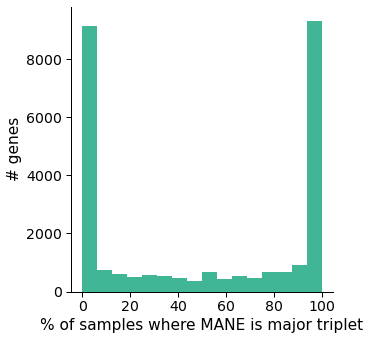

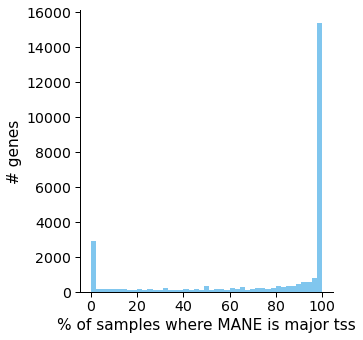

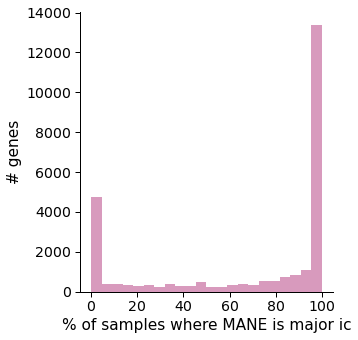

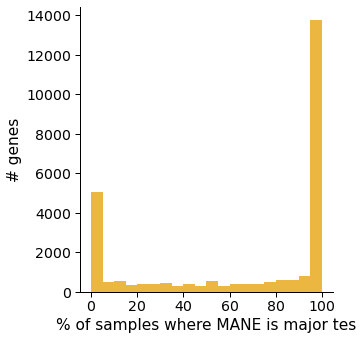

In [167]:
df = plot_major_principal_feat_counts(sg, opref='figures/', obs_col=obs_col, gene_subset=inds)

In [116]:
gnames = ['MEF2C', 'COL1A1']
temp.loc[temp.gname.isin(gnames)]

,gname,gid_stable,n_sample_major_iso,n_sample_not_major_iso,n_expressed_samples,prop_major_samples
8842,COL1A1,ENSG00000108821,0,29,29,0.0
16140,MEF2C,ENSG00000081189,0,42,42,0.0
